In [ ]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/artbm01/Documents/Python-DataAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [4]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [8]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [11]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [12]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [ ]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [18]:
df_DA_US_pivot.drop('Total', inplace=True)

/var/folders/kk/05dcg5911v91lx6tv4f_gcdh0000gn/T/ipykernel_98342/4277831818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US_pivot.drop('Total', inplace=True)


In [23]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [ ]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, 0)

In [66]:
#Change month no to month name
df_DA_US_percent.reset_index(inplace=True)
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns = 'job_posted_month_no')
df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0.541676,0.422887,0.292913,0.265364,0.215682,0.178126,0.157405,0.113963,0.114434,0.084530,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000118,0.000118,0.000000,0.0000
Feb,0.517309,0.422436,0.273677,0.264206,0.197910,0.170640,0.183214,0.120509,0.115121,0.083932,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Mar,0.518816,0.427951,0.290125,0.270666,0.199099,0.183500,0.169508,0.118366,0.107591,0.067224,...,0.000161,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Apr,0.532319,0.421392,0.295751,0.277567,0.215242,0.171599,0.174740,0.114895,0.107456,0.072574,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000165,0.000000,0.000000,0.000000,0.0000
May,0.516924,0.424194,0.286802,0.270178,0.194673,0.173643,0.172241,0.111556,0.103144,0.071700,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0002
Jun,0.503607,0.419145,0.286468,0.283125,0.173148,0.178955,0.174028,0.126870,0.109801,0.072849,...,0.000000,0.000176,0.000000,0.00000,0.000176,0.000000,0.000000,0.000000,0.000000,0.0000
Jul,0.501634,0.407229,0.294751,0.276485,0.191502,0.169391,0.169391,0.112863,0.105557,0.077101,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Aug,0.514622,0.411667,0.294091,0.305246,0.192342,0.191589,0.182092,0.113355,0.112451,0.072957,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Sep,0.494719,0.388230,0.291658,0.264928,0.184523,0.160811,0.176762,0.103039,0.102393,0.077387,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


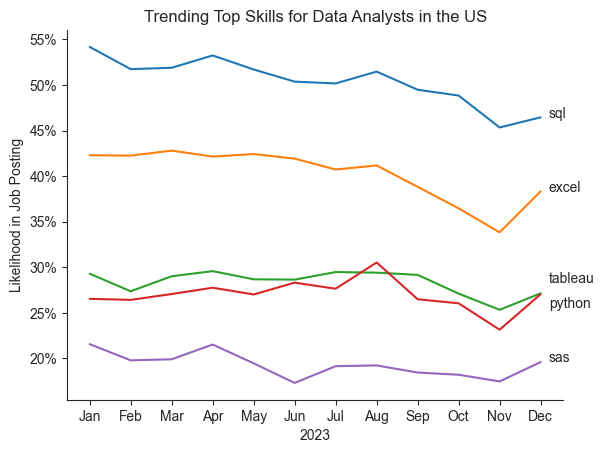

In [ ]:
df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_style('ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
offsets = [0, 0, 1.2, -1.5, 0]
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i] + offsets[i], df_plot.columns[i])
plt.show()